**This project about electricity generation is a comprehensive study of the trends in electricity generation globally. The primary objective of the analysis was to identify the extent of renewable energies as a source of electricity, being used by different continents and countries. The project involved analyzing data related to electricity generation and a variety energy sources production.**

- The first part of the analysis starts with a worldwide examination, showing the global trends regarding electricity generation.
- The second part shows the different trends among continents, including the main key factors that may cause the differences and the correlation between them. 
- The third part shows a drill-down analysis of six countries with different economic, social, and environmental characteristics, which impact directly on how they produced their energy. 
- The last part of the analysis shows a micro view analysis of Israel - How does the country produce its energy? How and whether it meets the Government's targets for increasing renewable energies as a source of electricity generation?

# **<u>Worldwide analysis</u>**

**\- How does electricity generation change over time? (in TWh per year)**

In [1]:
SELECT *
FROM 
    (SELECT ROUND(electricity_generation,0) AS EG ,YEAR 
     FROM Energy) AS S
PIVOT
(
SUM(EG) FOR [YEAR] IN ([2000],[2005],[2010],[2015],[2018])
) AS PVT



(1 row affected)

Total execution time: 00:00:00.029

2000,2005,2010,2015,2018
18905,23297,28785,33402,37386


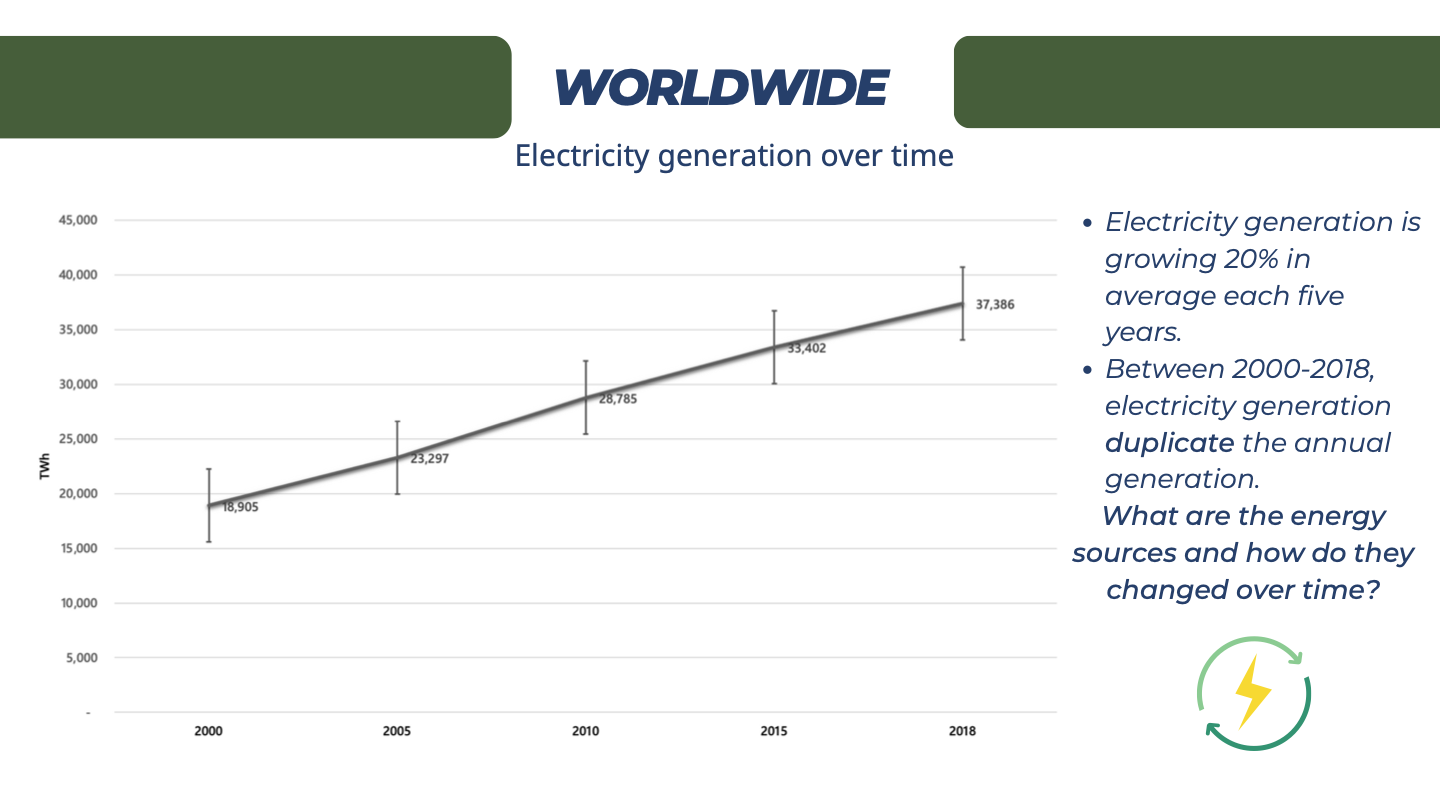

**\- What are the main sources of electricity generation in the years 2000 and 2018? (in %)**

In [2]:
SELECT 
    YEAR,
    ROUND(SUM(gas_electricity)     / SUM(electricity_generation),3) * 100 AS 'gas_share',
    ROUND(SUM(coal_electricity)    / SUM(electricity_generation),3) * 100 AS 'coal_share',
    ROUND(SUM(oil_electricity)     / SUM(electricity_generation),3) * 100 AS 'oil_share',
    ROUND(SUM(solar_electricity)   / SUM(electricity_generation),3) * 100 AS 'solar_share',
    ROUND(SUM(wind_electricity)    / SUM(electricity_generation),3) * 100 AS 'wind_share',
    ROUND(SUM(hydro_electricity)   / SUM(electricity_generation),3) * 100 AS 'hydro_share',
    ROUND(SUM(biofuel_electricity) / SUM(electricity_generation),3) * 100 AS 'biofuel_share',
    ROUND(SUM(nuclear_electricity) / SUM(electricity_generation),3) * 100 AS 'nuclear_share'
FROM Energy
WHERE YEAR = 2000 OR YEAR = 2018
GROUP BY YEAR



(2 rows affected)

Total execution time: 00:00:00.010

YEAR,gas_share,coal_share,oil_share,solar_share,wind_share,hydro_share,biofuel_share,nuclear_share
2000,17.2,41,8.5,0,0.2,16.5,0.8,15.8
2018,19.3,44.5,3.5000000000000004,2.4,4.6,15.8,1.5,8.5


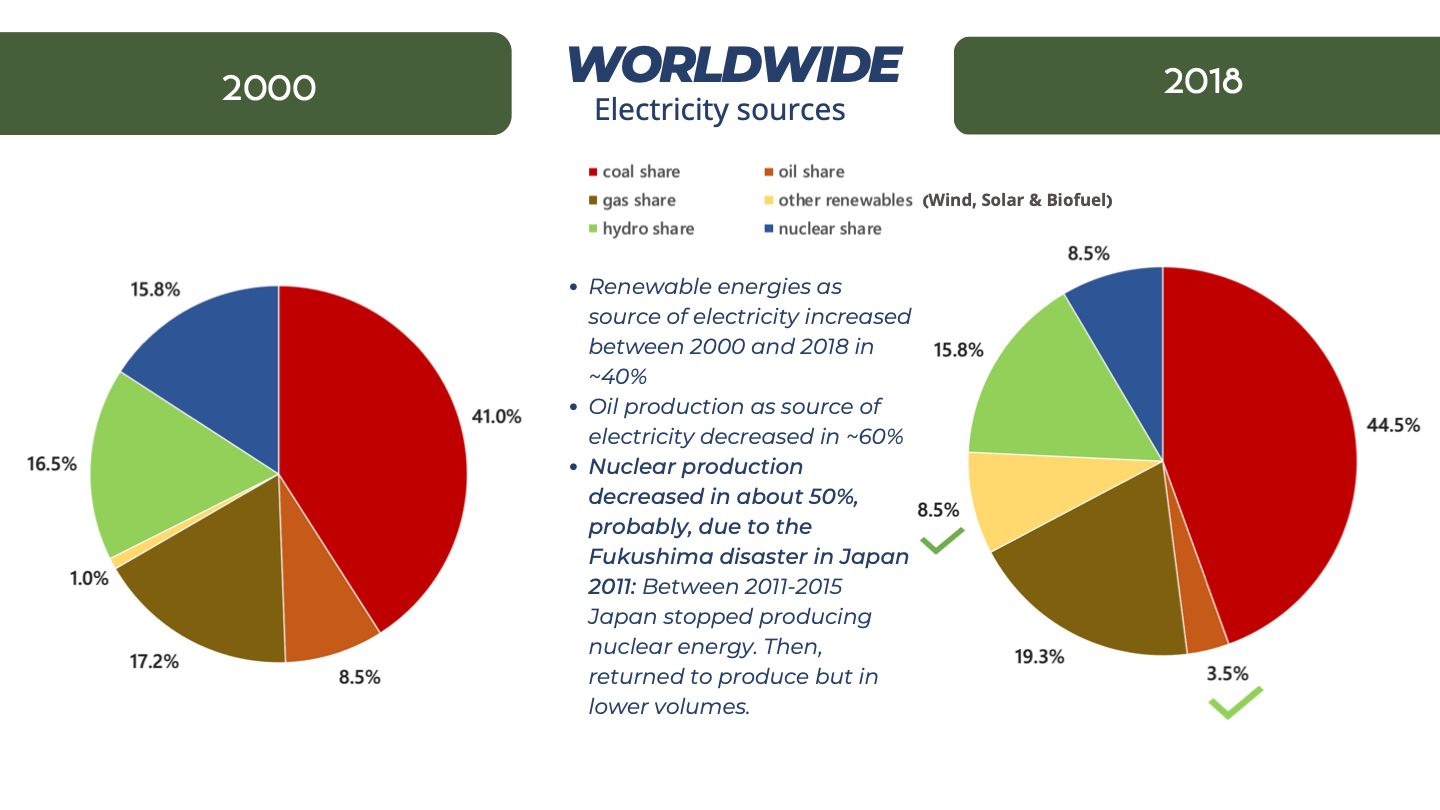

**\- What are the change rates in every five years (between 1990 to 2018) in the two main source types (renewable and conventional) as a source for electricity generation?**

In [10]:
SELECT YEAR,
       (ROUND(SUM(renewable_electricity)    / (LAG(SUM(renewable_electricity),1)    OVER(ORDER BY YEAR))-1,3)) * 100 AS '%_of_renewable_increase',
       (ROUND(SUM(conventional_electricity) / (LAG(SUM(conventional_electricity),1) OVER(ORDER BY YEAR))-1,3)) * 100 AS '%_of_conventional_increase'
FROM Energy
WHERE YEAR IN (1995, 2000, 2005, 2010, 2015, 2018)
GROUP BY YEAR
ORDER BY YEAR

(6 rows affected)

Total execution time: 00:00:00.046

YEAR,%_of_renewable_increase,%_of_conventional_increase
1995,NULL,NULL
2000,18.7,28.9
2005,18.7,28.1
2010,33.800000000000004,25.5
2015,38.800000000000004,14.399999999999999
2018,24.3,8.5


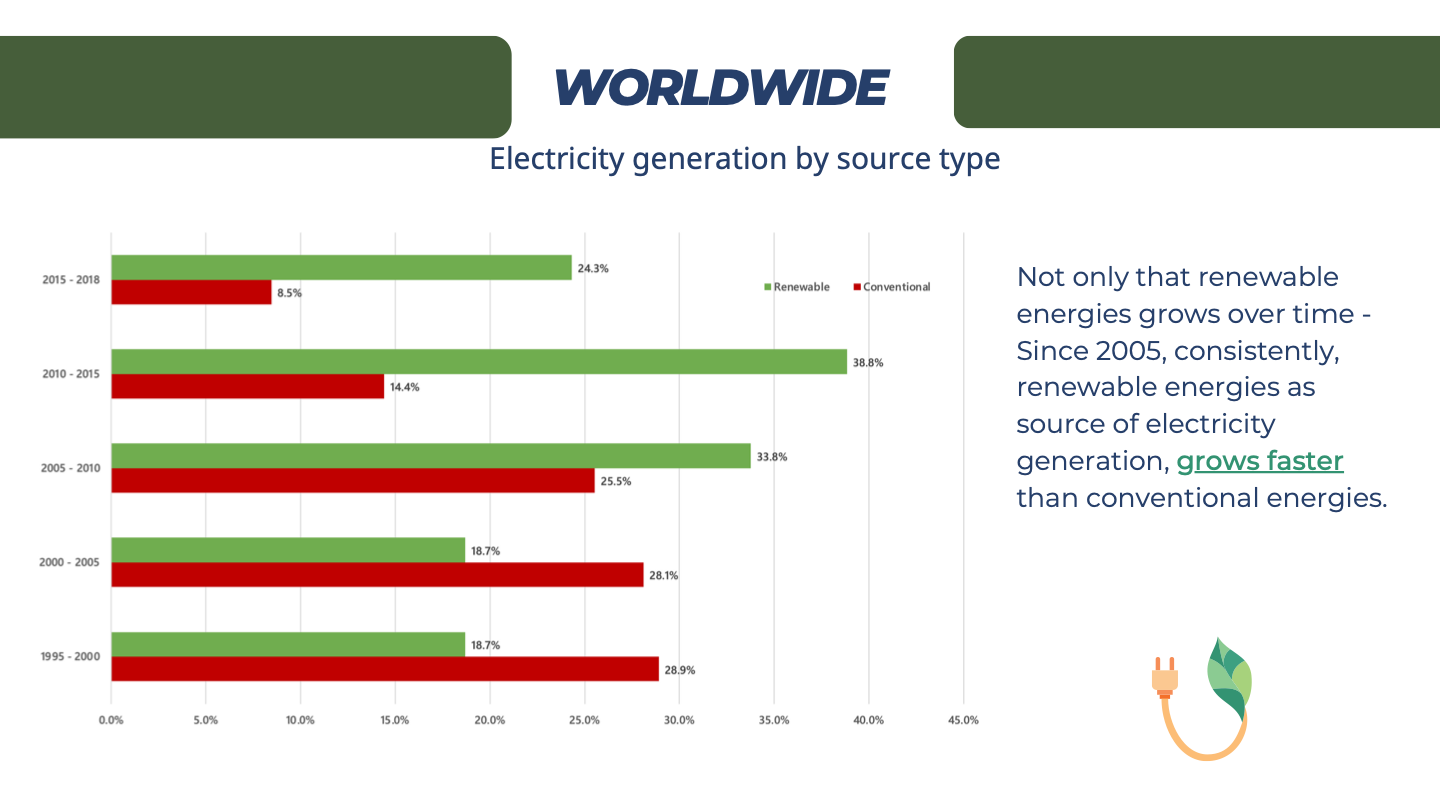

# **<u>Continents analysis</u>**

**\- How does electricity generation change over time among the different continents? (in TWh per year)**

In [4]:

SELECT * 
FROM 
    (SELECT Continent AS 'continent',
            ROUND(electricity_generation,0) AS 'electricity_generation',
            YEAR FROM Energy) AS S
PIVOT
(
SUM(electricity_generation) FOR [YEAR] IN ([2000],[2005],[2010],[2015],[2018])
) AS PVT

(6 rows affected)

Total execution time: 00:00:00.018

continent,2000,2005,2010,2015,2018
North America,4377,4648,4694,4717,4827
Asia,8666,12129,17034,21445,25120
Africa,409,523,629,721,776
Oceania,240,264,286,285,295
South America,967,1134,1350,1544,1599
Europe,4246,4599,4792,4690,4769


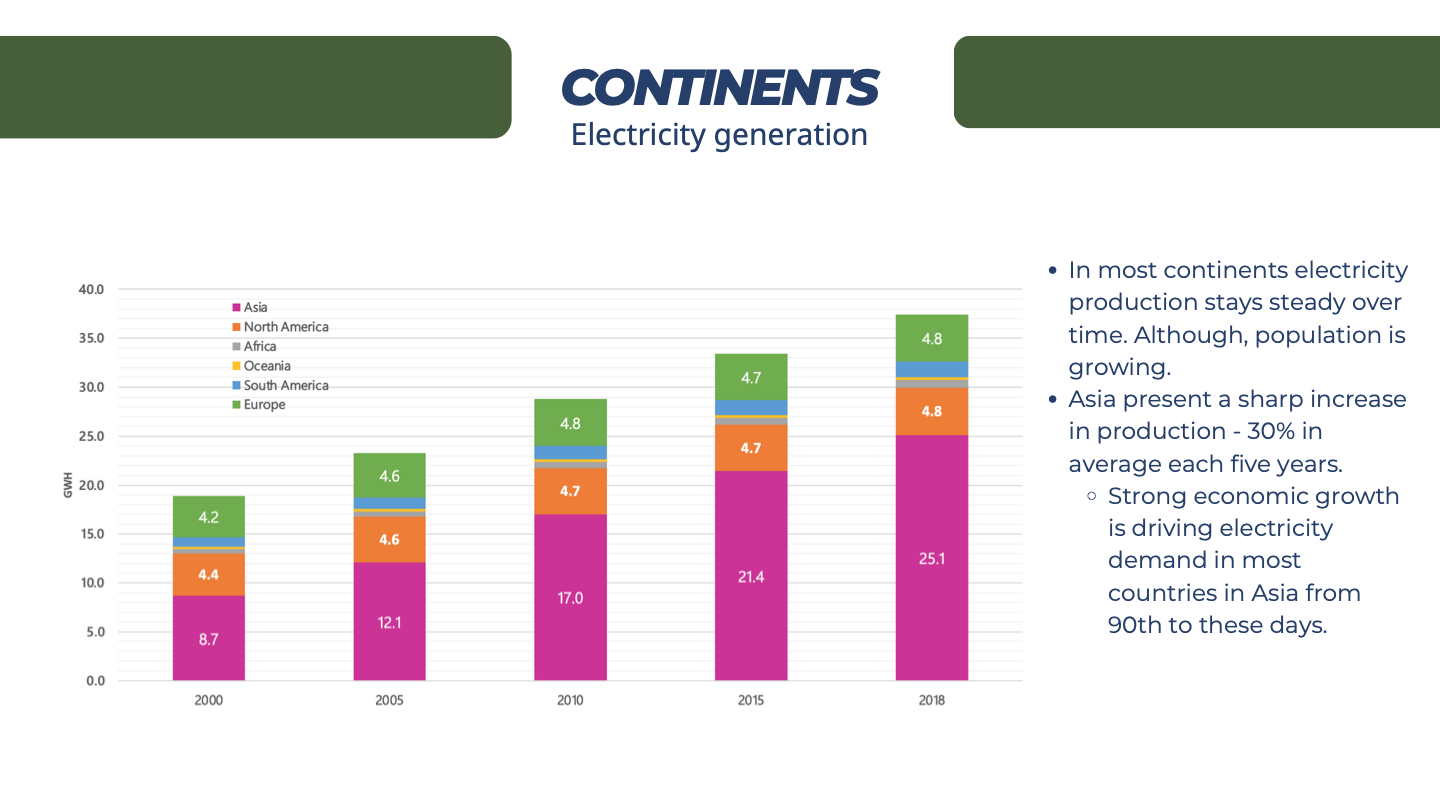

**\- What is the proportion between renewable and conventional energies as source of electricity in the years 2000 and 2018?**

In [5]:
SELECT Continent,
       ROUND(SUM(renewable_electricity)    / (SUM(renewable_electricity) + SUM(conventional_electricity)),2) AS 'Renewable',
       ROUND(SUM(conventional_electricity) / (SUM(renewable_electricity) + SUM(conventional_electricity)),2) AS 'Conventional'
FROM Energy
WHERE year = 2000
GROUP by Continent
ORDER BY Renewable DESC

SELECT Continent,
       ROUND(SUM(renewable_electricity)    / (SUM(renewable_electricity) + SUM(conventional_electricity)),2) AS 'Renewable',
       ROUND(SUM(conventional_electricity) / (SUM(renewable_electricity) + SUM(conventional_electricity)),2) AS 'Conventional'
FROM Energy
WHERE year = 2018
GROUP by Continent
ORDER BY Renewable DESC

(6 rows affected)

(6 rows affected)

Total execution time: 00:00:00.011

Continent,Renewable,Conventional
South America,0.62,0.38
Europe,0.26,0.74
North America,0.2,0.8
Oceania,0.18,0.82
Africa,0.18,0.82
Asia,0.14,0.86


Continent,Renewable,Conventional
South America,0.58,0.42
Europe,0.4,0.6
North America,0.29,0.71
Oceania,0.26,0.74
Asia,0.22,0.78
Africa,0.2,0.8


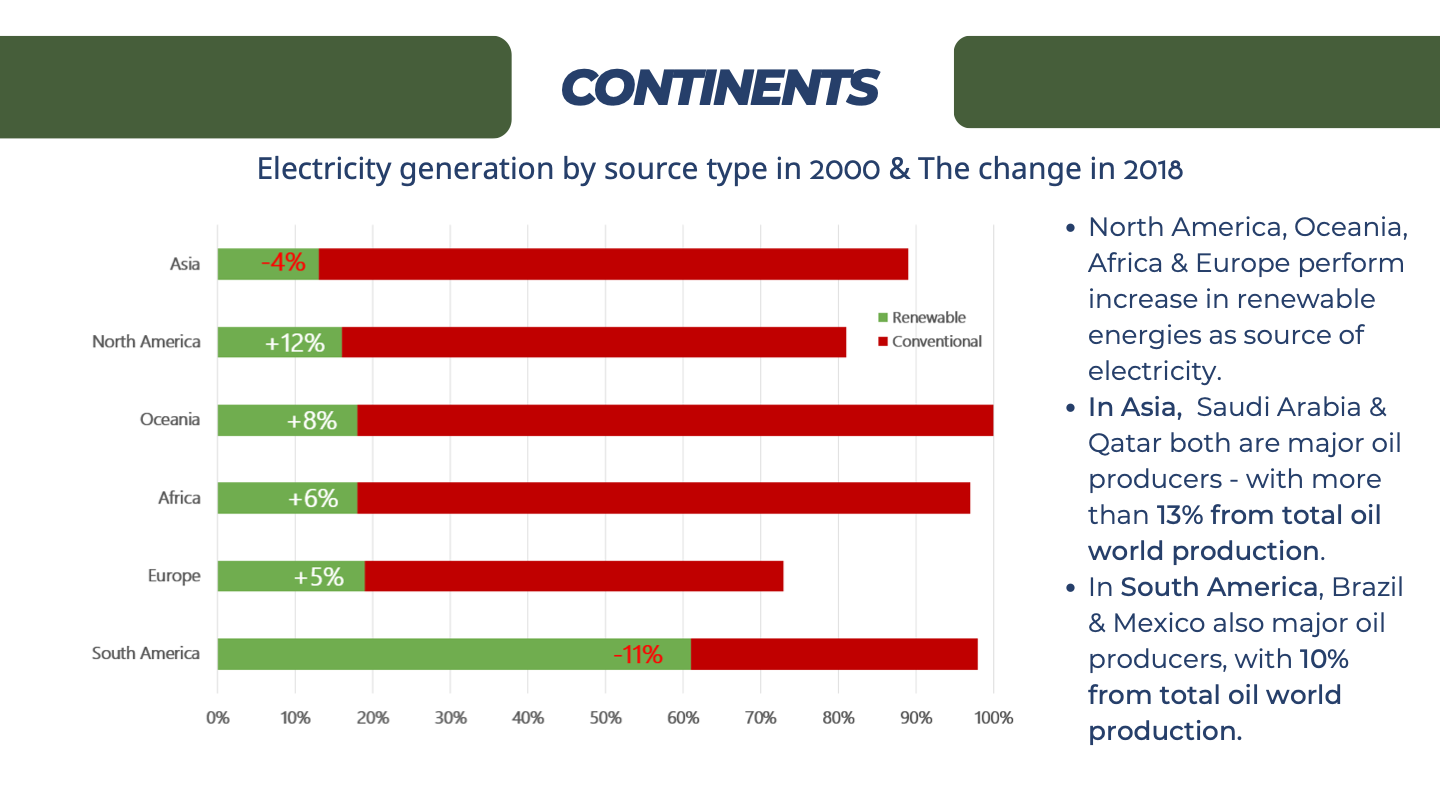

**\- What is the annually electricity generation per capita in 2018? (in KWh per capita)**

In [6]:
WITH Continents AS 
(
    SELECT Continent AS 'Continent',
           YEAR AS 'YEAR',
           ROUND(SUM(electricity_generation) * 1000000000 / SUM(population),0) AS 'energy_per_capita' 
    FROM Energy 
    GROUP BY continent, YEAR 
)

SELECT *
FROM Continents AS S
PIVOT
(
SUM(energy_per_capita) FOR [YEAR] IN ([2000],[2005],[2010],[2015],[2018]) 
) AS PVT

Warning: Null value is eliminated by an aggregate or other SET operation.

(6 rows affected)

Total execution time: 00:00:00.021

Continent,2000,2005,2010,2015,2018
Africa,510,575,607,612,624
Asia,2317,3050,4047,4838,5511
Europe,5849,6310,6506,6309,6387
North America,14011,14202,13673,13210,13248
Oceania,7703,7849,7786,7163,7131
South America,1856,2035,2284,2478,2491


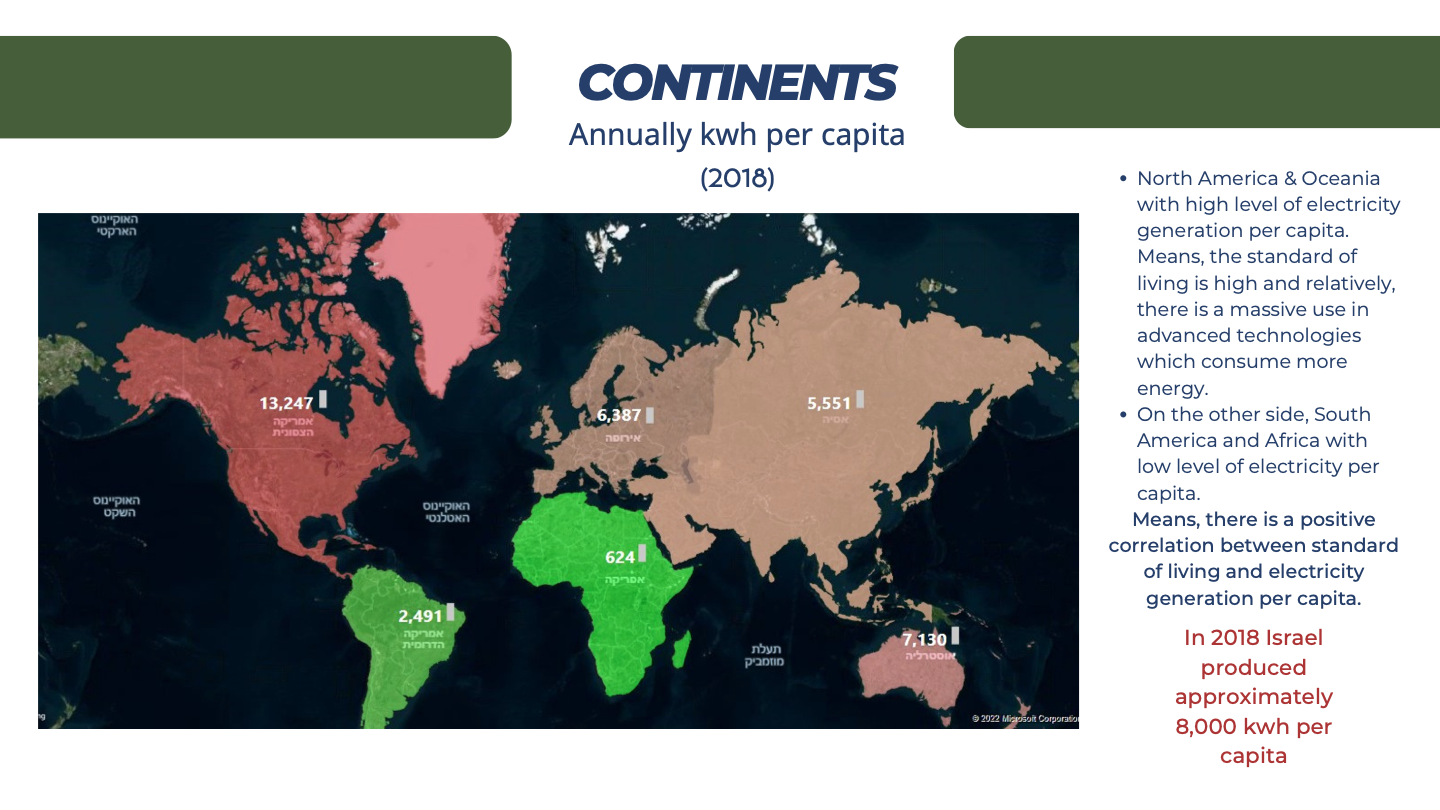

# **<u>Countries analysis</u>**

**\- What is the GDP per capita of the selected countries in the years 2000 and 2018? (in USD)**

In [7]:
WITH Countries AS 
(
  SELECT country,
         ROUND(SUM(GDP)/SUM(population),2) AS 'GDP_per_capita'
  FROM Energy
  WHERE YEAR = 2000
  GROUP BY country
)

SELECT *
FROM Countries AS K
PIVOT
(
SUM(GDP_per_capita) FOR [country] IN ([Israel],[Germany],[india],[Egypt],[United States],[Saudi Arabia])
) 
as pvt;

WITH Countries AS 
(
SELECT country,ROUND(SUM(GDP)/SUM(population),2) AS 'GDP_per_capita'
FROM Energy
where year = 2018
group by country
)

SELECT *
FROM Countries AS K
PIVOT
(
SUM(GDP_per_capita) FOR [country] IN ([Israel],[Germany],[india],[Egypt],[United States],[Saudi Arabia])
) 
as pvt;

Warning: Null value is eliminated by an aggregate or other SET operation.

(1 row affected)

Warning: Null value is eliminated by an aggregate or other SET operation.

(1 row affected)

Total execution time: 00:00:00.008

Israel,Germany,india,Egypt,United States,Saudi Arabia
30776.99,34274.76,1911.84,5157.48,46146.58,20470.38


Israel,Germany,india,Egypt,United States,Saudi Arabia
31853.97,47158.46,5589.06,11277.74,52583.95,44506.42


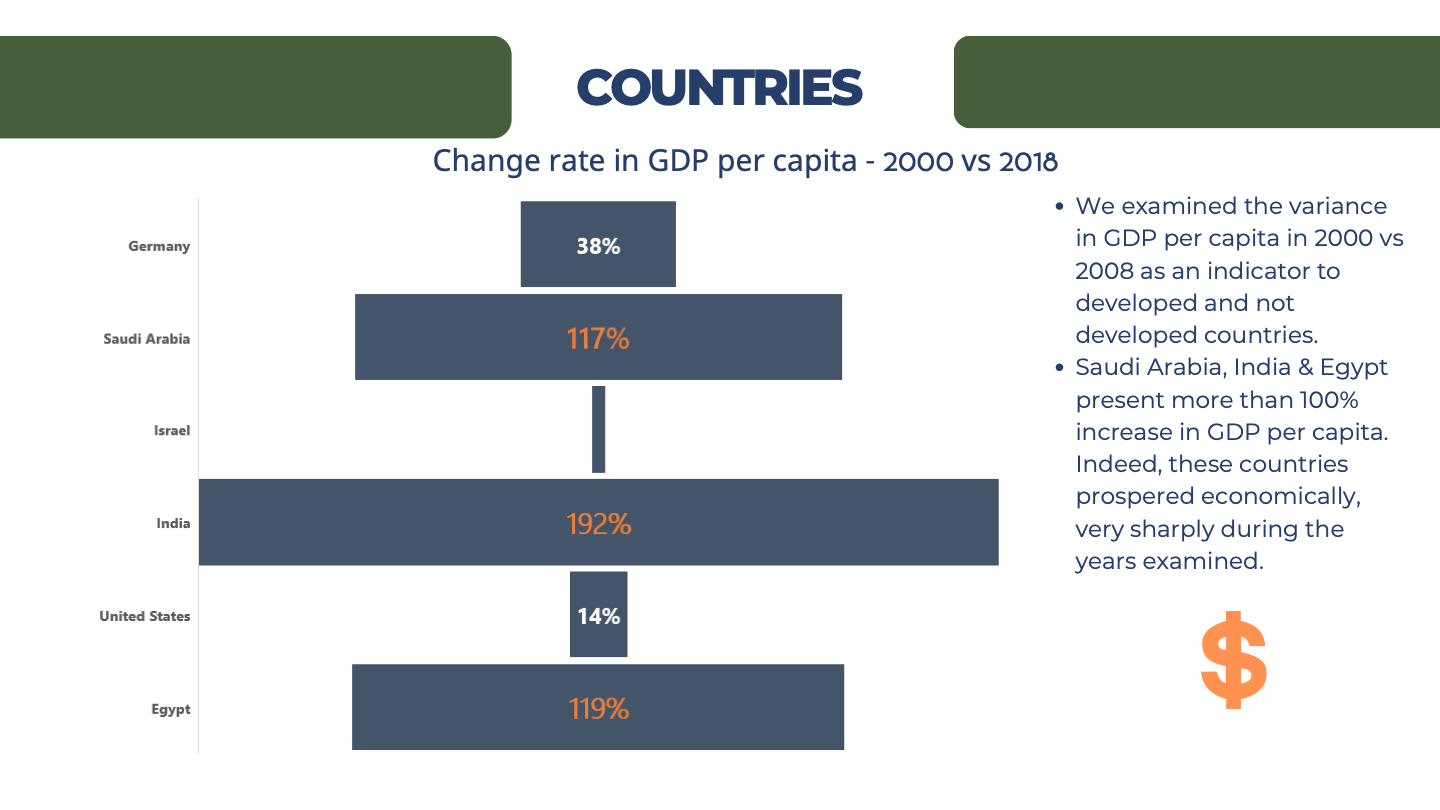

**\- What is the proportion between renewable and conventional energies as source of electricity generation in 2000 and 2018 for the selected countries?**

In [8]:
SELECT country,
       ROUND(SUM(renewable_electricity)/(SUM(renewable_electricity)    + SUM(conventional_electricity)),2) AS 'Renewable',
       ROUND(SUM(conventional_electricity)/(SUM(renewable_electricity) + SUM(conventional_electricity)),2) AS 'Conventional'
FROM Energy
WHERE country in ('Israel','Germany','india','Egypt','United States','Saudi Arabia') AND YEAR = 2000
GROUP BY country

SELECT country,
       ROUND(SUM(renewable_electricity)/(SUM(renewable_electricity)    + SUM(conventional_electricity)),2) AS 'Renewable',
       ROUND(SUM(conventional_electricity)/(SUM(renewable_electricity) + SUM(conventional_electricity)),2) AS 'Conventional'
FROM Energy
WHERE country in ('Israel','Germany','india','Egypt','United States','Saudi Arabia') AND YEAR = 2018
GROUP BY country

(6 rows affected)

(6 rows affected)

Total execution time: 00:00:00.008

country,Renewable,Conventional
Egypt,0.19,0.81
Germany,0.09,0.91
India,0.16,0.84
Israel,0,1
Saudi Arabia,0,1
United States,0.11,0.89


country,Renewable,Conventional
Egypt,0.09,0.91
Germany,0.4,0.6
India,0.19,0.81
Israel,0.03,0.97
Saudi Arabia,0,1
United States,0.21,0.79


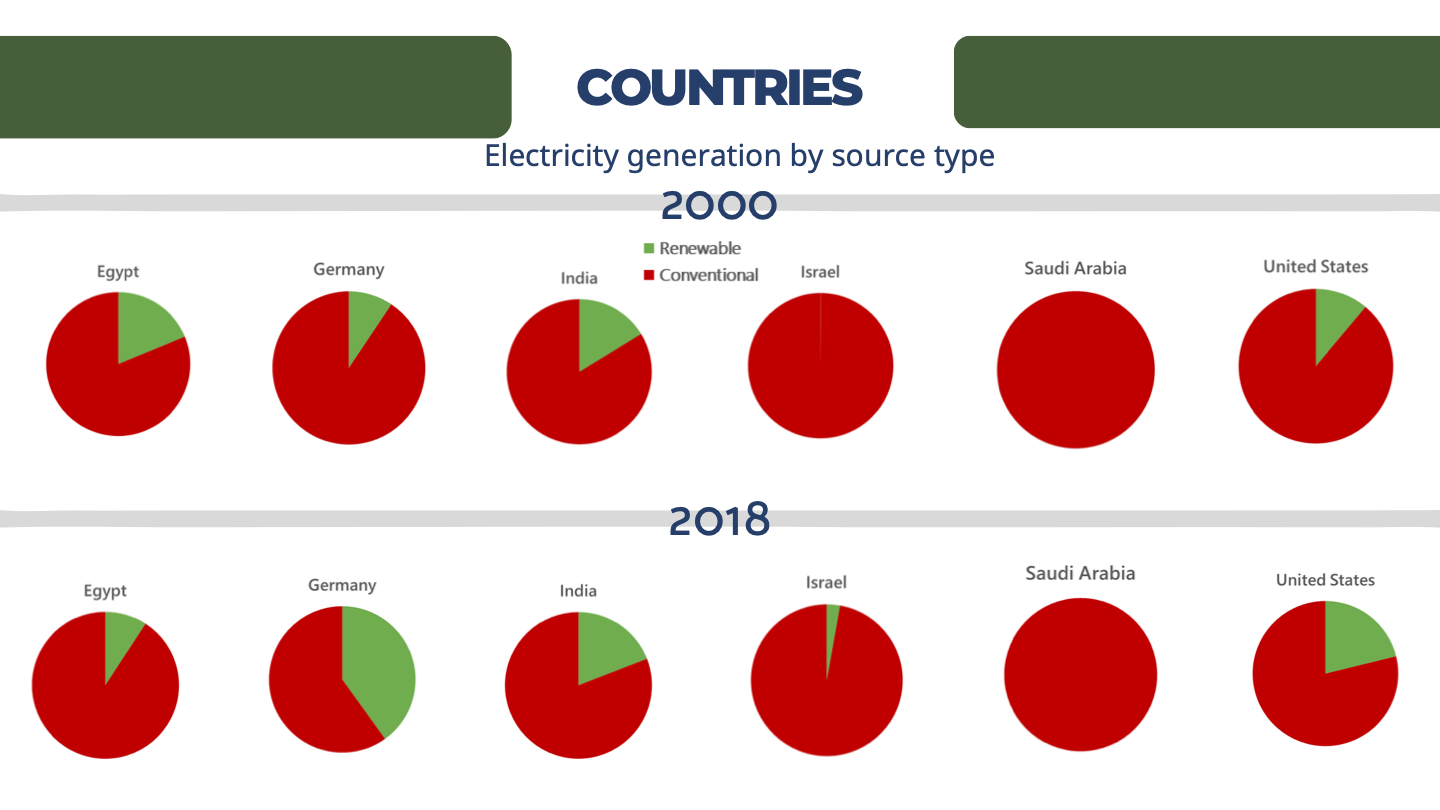

**\- How does electricity generation divided into energy sources in Israel 2018?**

In [9]:
SELECT country,
       ROUND(SUM(gas_electricity)/SUM(electricity_generation),3)     * 100 AS 'gas_share',
       ROUND(SUM(coal_electricity)/SUM(electricity_generation),3)    * 100 AS 'coal_share',
       ROUND(SUM(oil_electricity)/Sum(electricity_generation),3)     * 100 AS 'oil_share',
       ROUND(SUM(solar_electricity)/SUM(electricity_generation),3)   * 100 AS 'solar_share',
       ROUND(SUM(wind_electricity)/SUM(electricity_generation),3)    * 100 AS 'wind_share',
       ROUND(SUM(hydro_electricity)/SUM(electricity_generation),3)   * 100 AS 'hydro_share',
       ROUND(SUM(biofuel_electricity)/SUM(electricity_generation),3) * 100 AS 'biofuel_share',
       ROUND(SUM(nuclear_electricity)/SUM(electricity_generation),3) * 100 AS'nuclear_share'
FROM Energy
WHERE YEAR = 2018 AND country = 'israel'
GROUP BY country

(1 row affected)

Total execution time: 00:00:00.017

country,gas_share,coal_share,oil_share,solar_share,wind_share,hydro_share,biofuel_share,nuclear_share
Israel,63.7,33.5,0,2.4,0.1,0,0.3,0


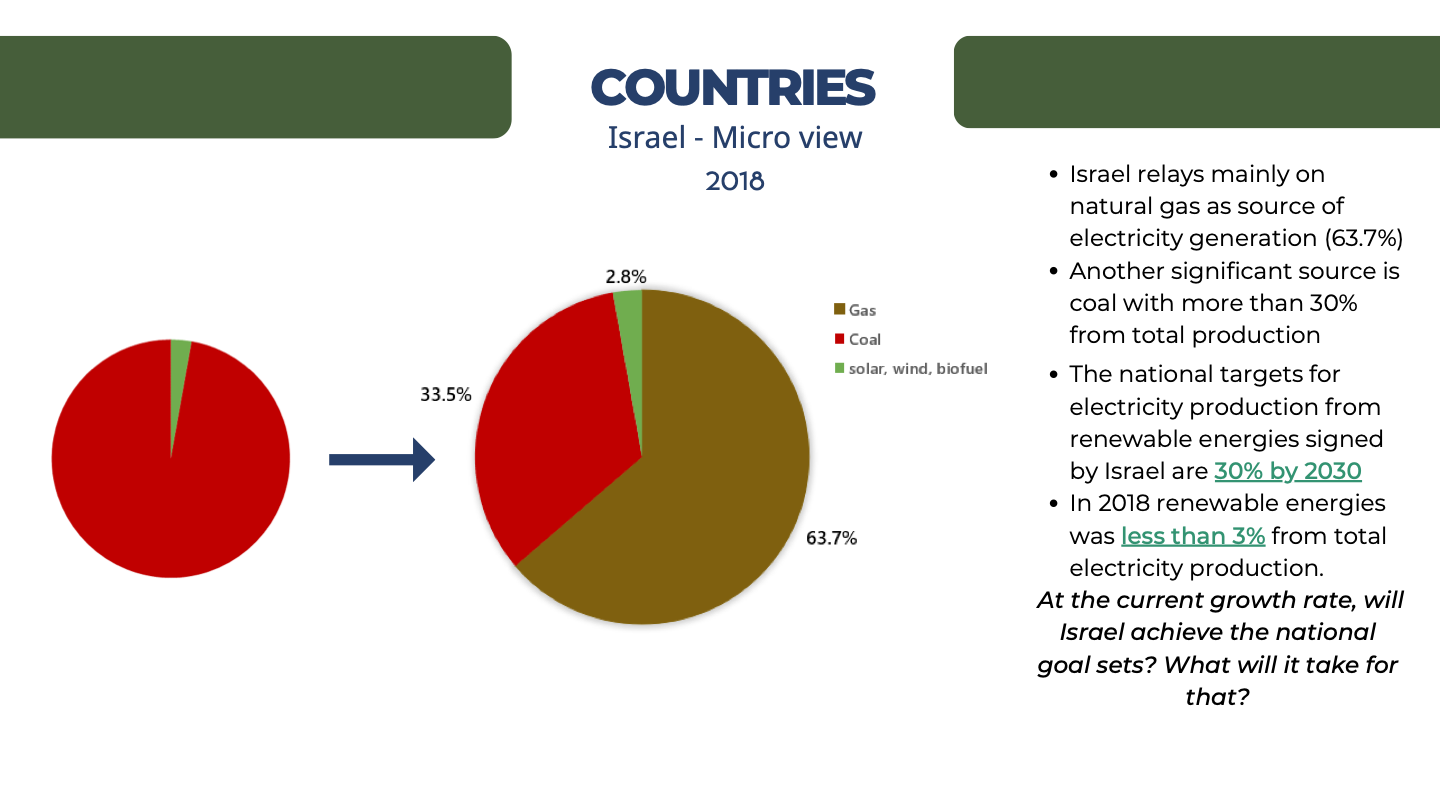

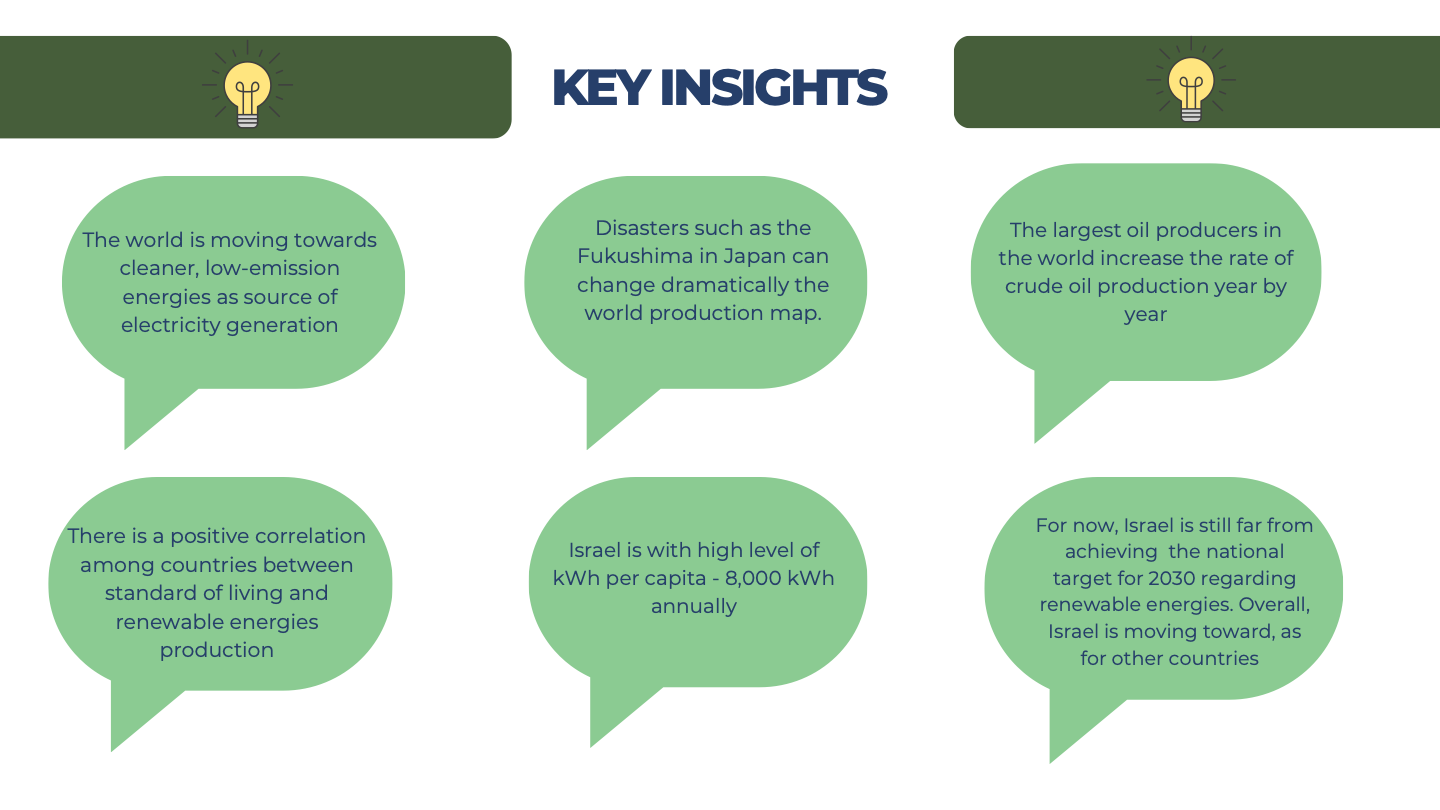